In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('mobile_clean.csv')
df_real = df.copy()

In [3]:
df.head()

,Spec Score,rating,price,camera,sup_3G,sup_4G,sup_5G,nfc,proc_GHz,ram,rom,bat_size,inches,disp_size,disp_hz,front_camera,camera_amount,ext_memory,is_ext_memory,creator
0,89,4.65,41990,50.0,1,1,1,1,3.25,12.0,256.0,6200.0,6.83,3561600.0,120.0,50.0,3,NaN,1,OPPO
1,87,4.75,32990,50.0,1,1,1,1,3.35,8.0,256.0,6000.0,6.59,3466560.0,120.0,50.0,3,NaN,1,OPPO
2,83,4.75,31999,50.0,1,1,1,1,3.20,12.0,256.0,7550.0,6.83,3548160.0,120.0,20.0,2,NaN,0,Poco
3,89,4.65,49990,50.0,1,1,1,1,3.25,12.0,256.0,6500.0,6.31,3210240.0,120.0,50.0,3,NaN,0,Vivo
4,73,4.20,11999,50.0,1,1,1,0,2.40,4.0,128.0,6000.0,6.67,1154880.0,120.0,8.0,2,2048.0,1,OPPO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Spec Score     998 non-null    int64  
 1   rating         998 non-null    float64
 2   price          998 non-null    int64  
 3   camera         998 non-null    float64
 4   sup_3G         998 non-null    int64  
 5   sup_4G         998 non-null    int64  
 6   sup_5G         998 non-null    int64  
 7   nfc            998 non-null    int64  
 8   proc_GHz       855 non-null    float64
 9   ram            985 non-null    float64
 10  rom            988 non-null    float64
 11  bat_size       998 non-null    float64
 12  inches         998 non-null    float64
 13  disp_size      998 non-null    float64
 14  disp_hz        915 non-null    float64
 15  front_camera   978 non-null    float64
 16  camera_amount  998 non-null    int64  
 17  ext_memory     353 non-null    float64
 18  is_ext_mem

In [5]:
df.isnull().sum()

Spec Score         0
rating             0
price              0
camera             0
sup_3G             0
sup_4G             0
sup_5G             0
nfc                0
proc_GHz         143
ram               13
rom               10
bat_size           0
inches             0
disp_size          0
disp_hz           83
front_camera      20
camera_amount      0
ext_memory       645
is_ext_memory      0
creator            0
dtype: int64

/tmp/ipykernel_104/2382632263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes, palette='magma')
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_104/2382632263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

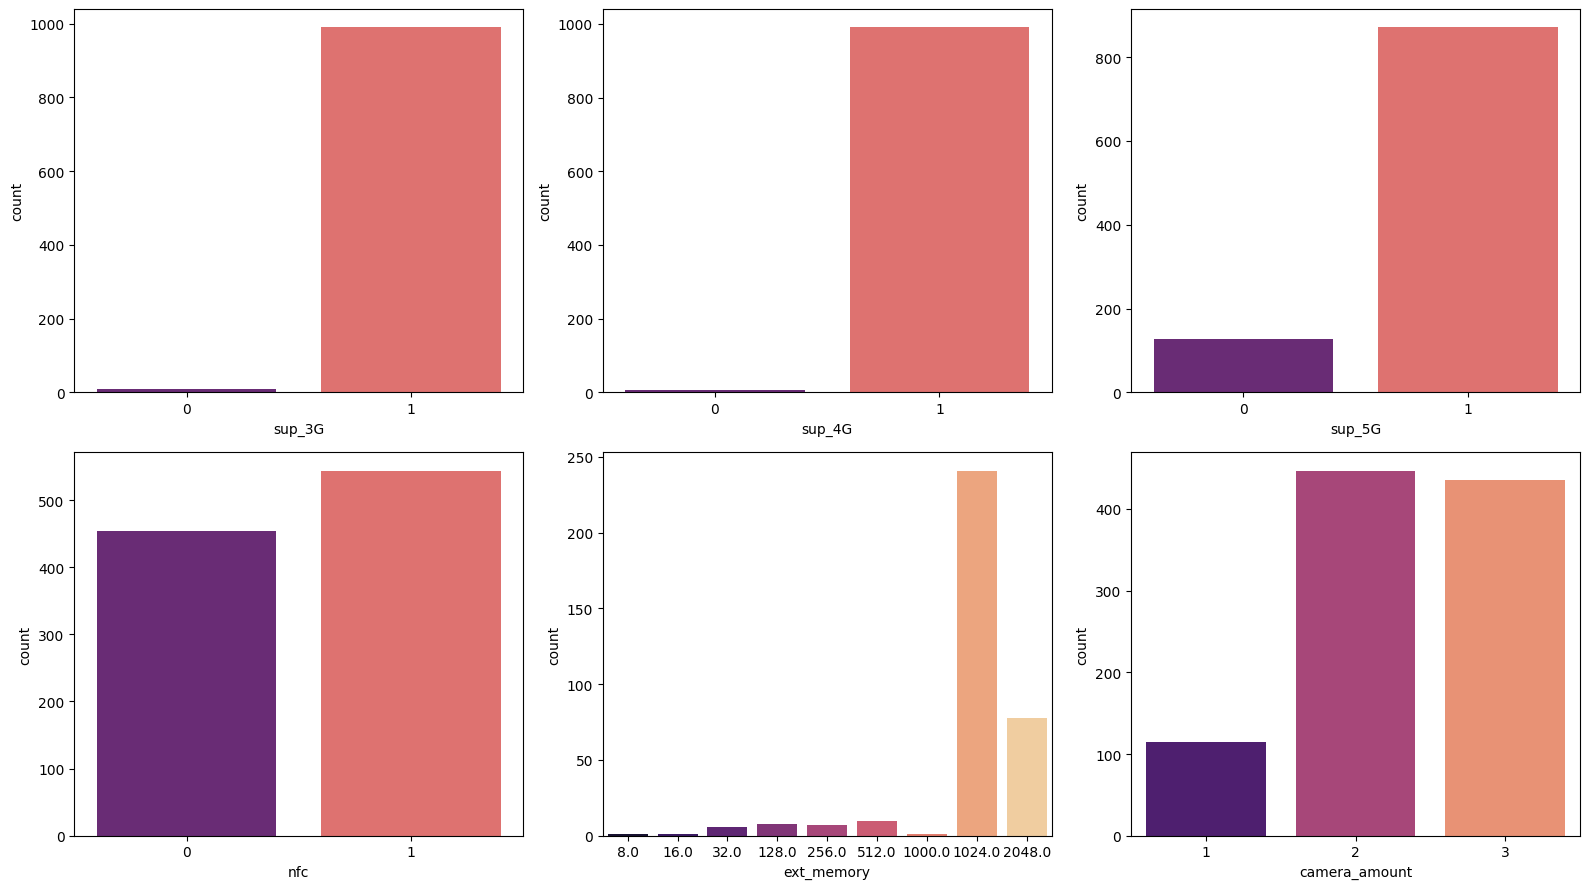

In [6]:
line = ['sup_3G', 'sup_4G', 'sup_5G', 'nfc', 'ext_memory', 'camera_amount']
plt.rcParams['figure.figsize'] = [16, 9]
axes = plt.subplot(2, 3, 1)
for index, col in enumerate(line):
    axes = plt.subplot(2, 3, index + 1)
    sns.countplot(x=col, data=df, ax=axes, palette='magma')
plt.tight_layout()
plt.show()

/tmp/ipykernel_104/2703170168.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_group, x = 'creator', y='count', palette='viridis')
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with

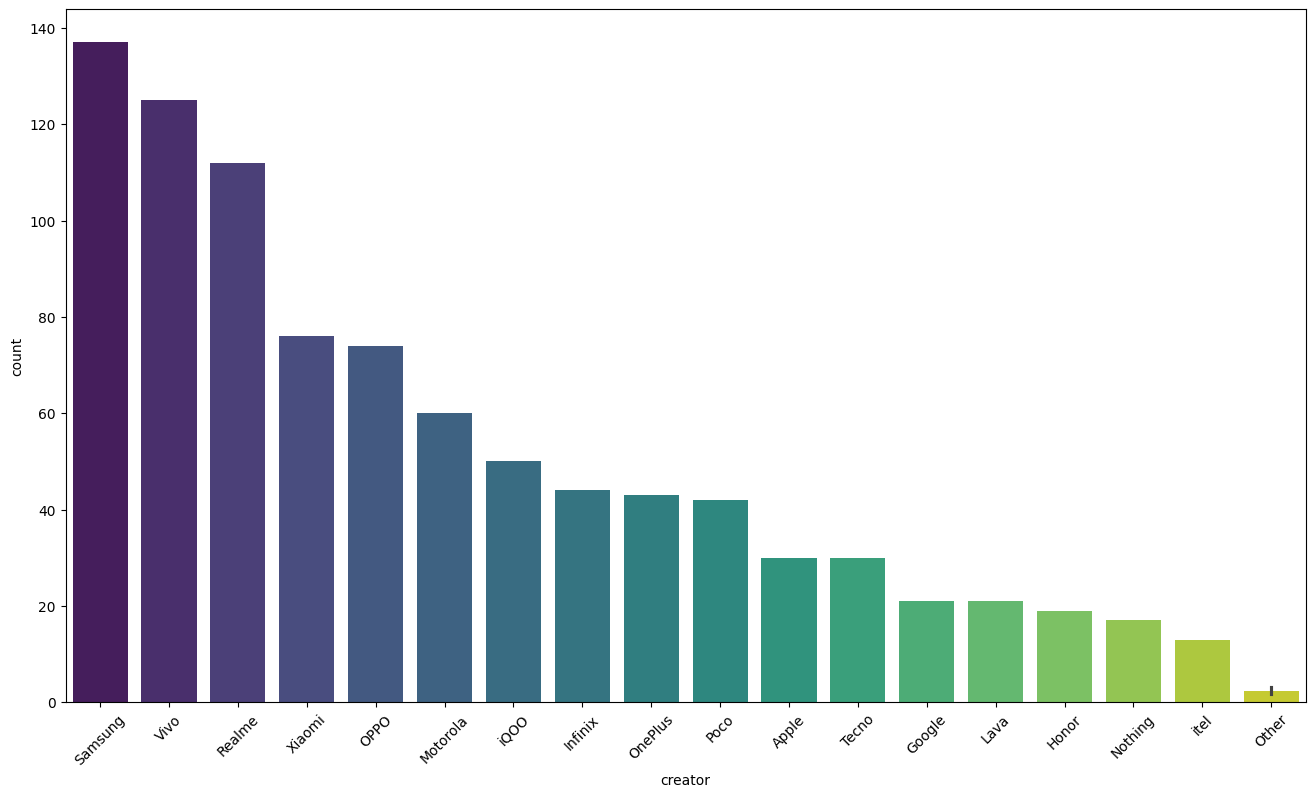

In [7]:
plt.figure(figsize=(16, 9))
df_group = df.groupby('creator').agg({'creator': 'count'})
df_group.rename(columns={'creator': 'count'}, inplace=True)
df_group = df_group.reset_index()
df_group.loc[df_group['count'] < 10, 'creator'] = 'Other'
df_group.loc[df_group['creator'] == 'Oppo', 'creator'] = 'OPPO'
df_group.groupby('creator').sum()
df_group = df_group.sort_values(by='count', ascending=False)
sns.barplot(data=df_group, x = 'creator', y='count', palette='viridis')
plt.xticks(rotation=45)
plt.show()

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


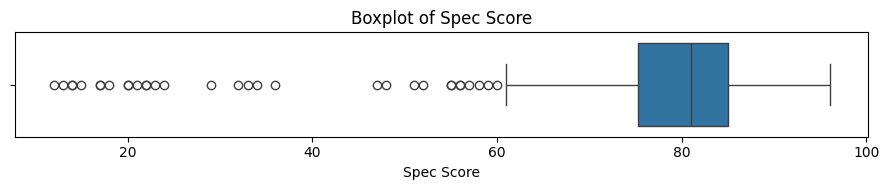

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
Lower bound: 60.625
Upper bound: 99.625
Number of outliers: 32



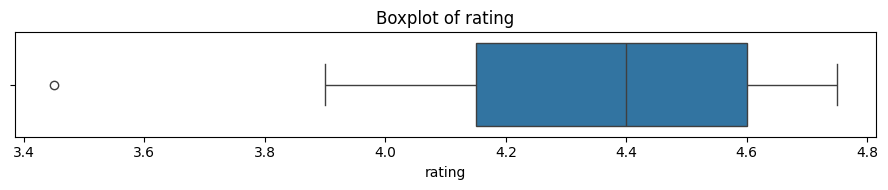

Lower bound: 3.4750000000000014
Upper bound: 5.274999999999999
Number of outliers: 1

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


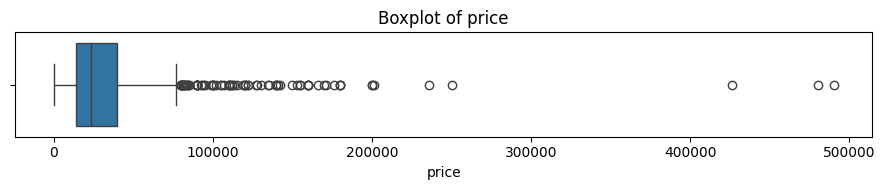

Lower bound: -24803.75
Upper bound: 78866.25
Number of outliers: 84

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


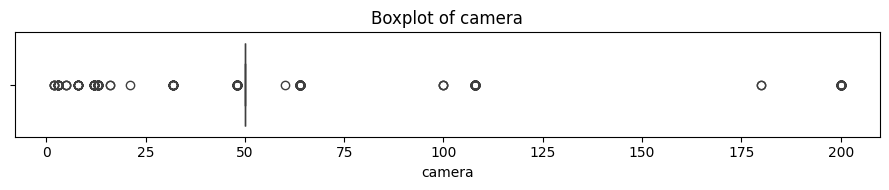

Lower bound: 50.0
Upper bound: 50.0
Number of outliers: 317

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


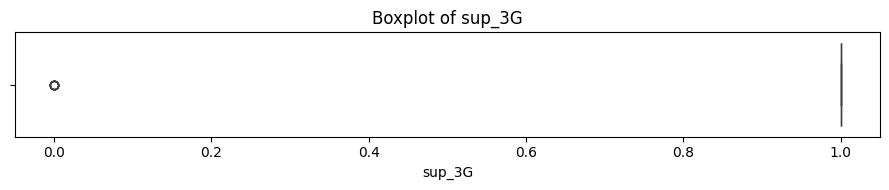

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 8

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


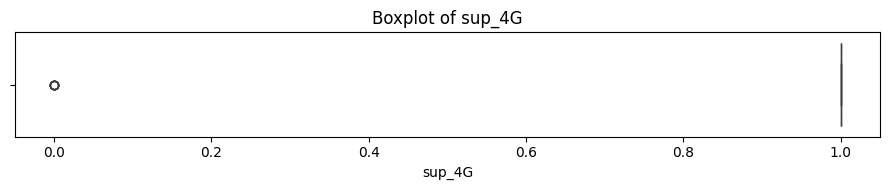

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 7

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


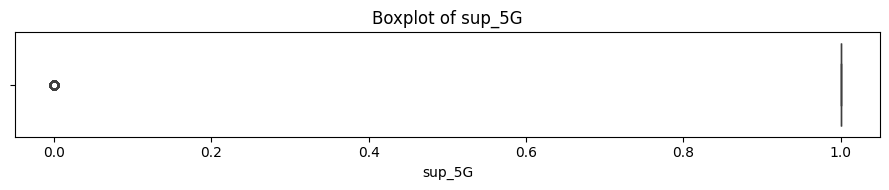

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 127

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


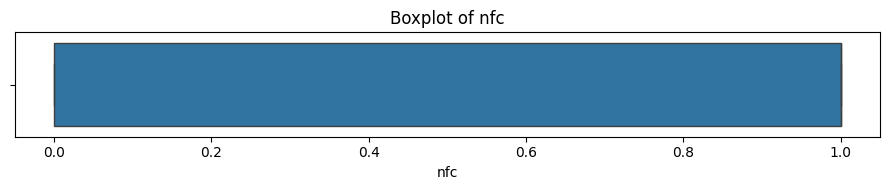

Lower bound: -1.5
Upper bound: 2.5
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


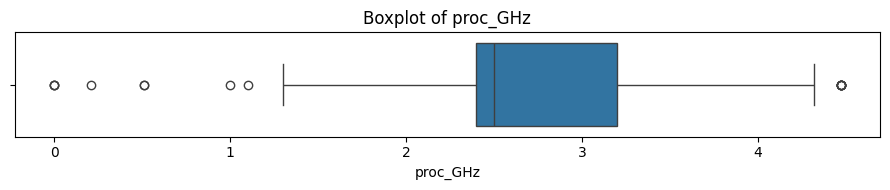

Lower bound: 1.1999999999999995
Upper bound: 4.4
Number of outliers: 15

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


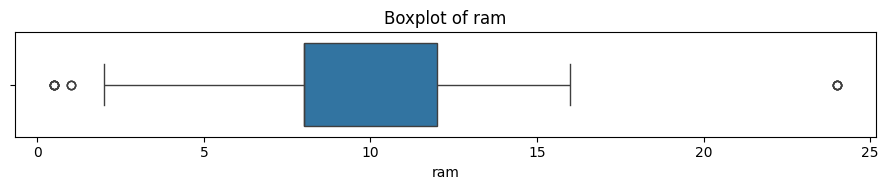

Lower bound: 2.0
Upper bound: 18.0
Number of outliers: 15

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


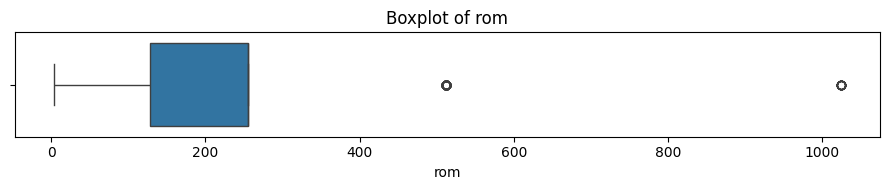

Lower bound: -64.0
Upper bound: 448.0
Number of outliers: 103

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


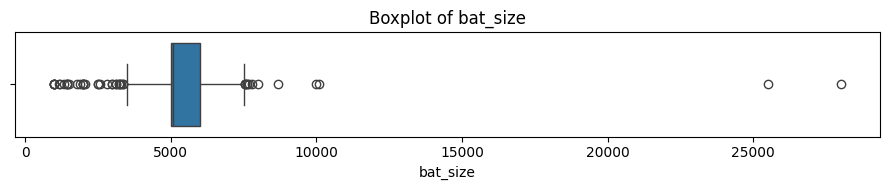

Lower bound: 3500.0
Upper bound: 7500.0
Number of outliers: 46

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


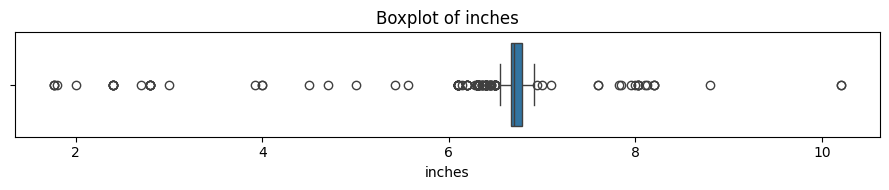

Lower bound: 6.504999999999999
Upper bound: 6.945
Number of outliers: 154

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


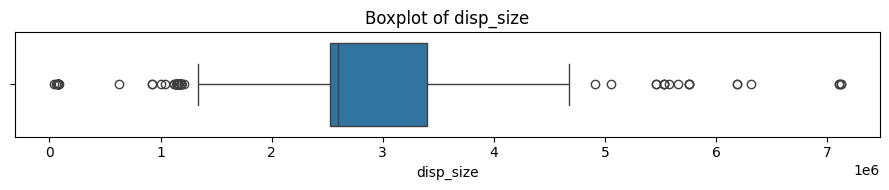

Lower bound: 1219500.0
Upper bound: 4706700.0
Number of outliers: 213

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


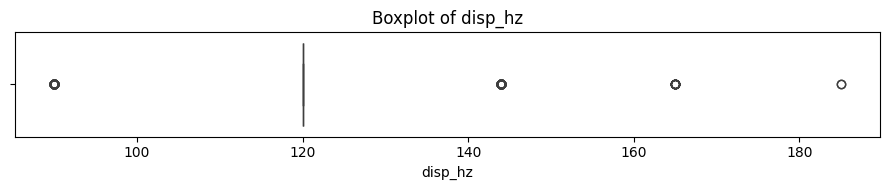

Lower bound: 120.0
Upper bound: 120.0
Number of outliers: 207

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


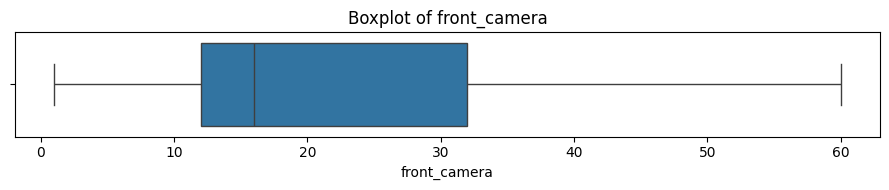

Lower bound: -18.0
Upper bound: 62.0
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


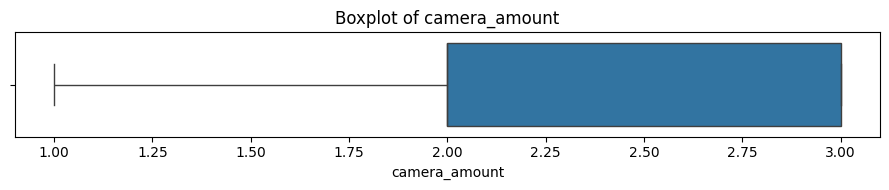

Lower bound: 0.5
Upper bound: 4.5
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


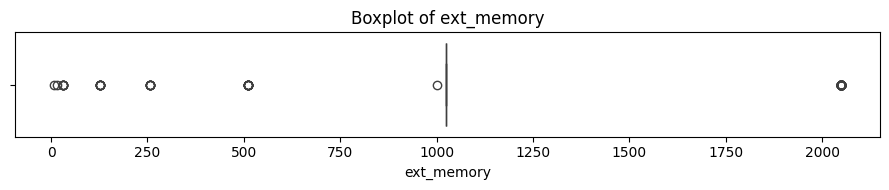

Lower bound: 1024.0
Upper bound: 1024.0
Number of outliers: 112

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


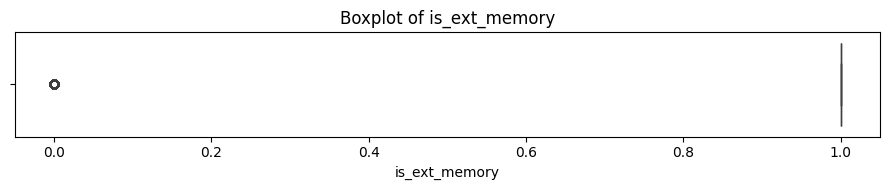

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 217



In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    plt.figure(figsize=(9,2))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Lower bound:', l_bound)
    print('Upper bound:', u_bound)
    print('Number of outliers:', df[(df[col] < l_bound) | (df[col] > u_bound)].shape[0])
    print()

In [9]:
df.isnull().sum()

Spec Score         0
rating             0
price              0
camera             0
sup_3G             0
sup_4G             0
sup_5G             0
nfc                0
proc_GHz         143
ram               13
rom               10
bat_size           0
inches             0
disp_size          0
disp_hz           83
front_camera      20
camera_amount      0
ext_memory       645
is_ext_memory      0
creator            0
dtype: int64

In [10]:
del df['ext_memory']
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 997
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Spec Score     792 non-null    int64  
 1   rating         792 non-null    float64
 2   price          792 non-null    int64  
 3   camera         792 non-null    float64
 4   sup_3G         792 non-null    int64  
 5   sup_4G         792 non-null    int64  
 6   sup_5G         792 non-null    int64  
 7   nfc            792 non-null    int64  
 8   proc_GHz       792 non-null    float64
 9   ram            792 non-null    float64
 10  rom            792 non-null    float64
 11  bat_size       792 non-null    float64
 12  inches         792 non-null    float64
 13  disp_size      792 non-null    float64
 14  disp_hz        792 non-null    float64
 15  front_camera   792 non-null    float64
 16  camera_amount  792 non-null    int64  
 17  is_ext_memory  792 non-null    int64  
 18  creator        

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


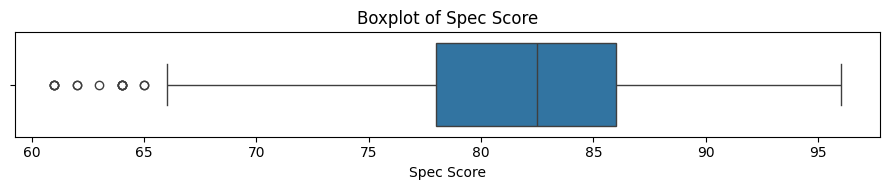

Lower bound: 66.0
Upper bound: 98.0
Number of outliers: 14

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


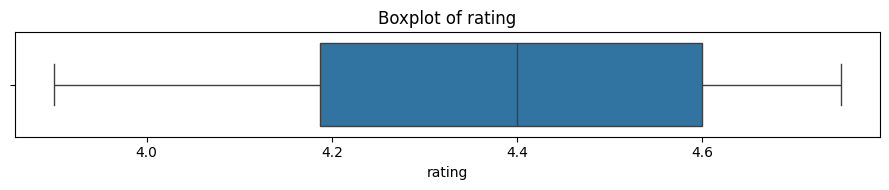

Lower bound: 3.5687500000000005
Upper bound: 5.218749999999999
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


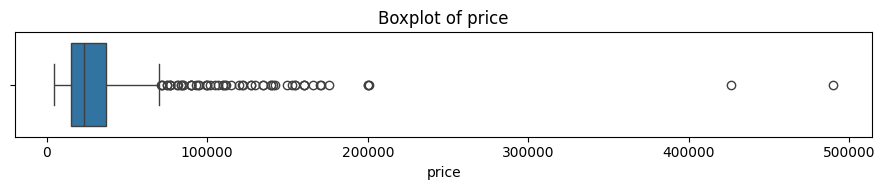

Lower bound: -18243.375
Upper bound: 70133.625
Number of outliers: 60

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


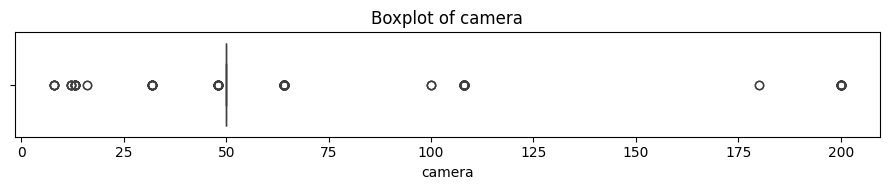

Lower bound: 50.0
Upper bound: 50.0
Number of outliers: 230

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


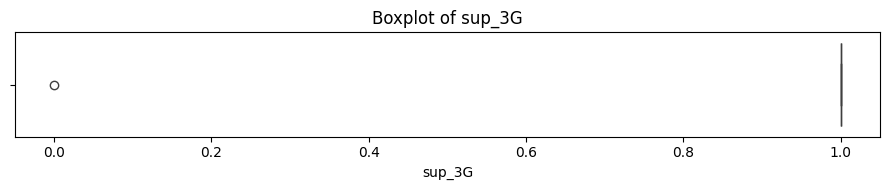

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 1

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


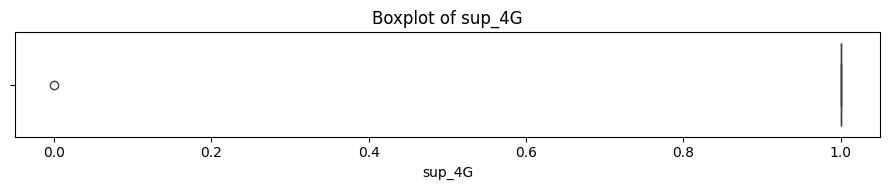

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 1

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


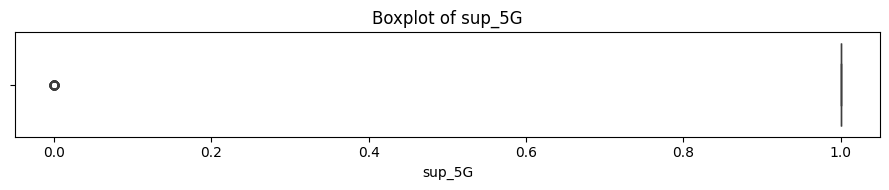

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 69

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


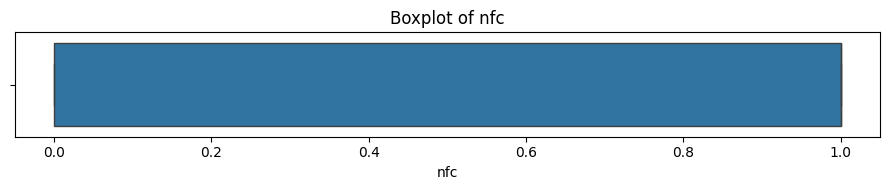

Lower bound: -1.5
Upper bound: 2.5
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


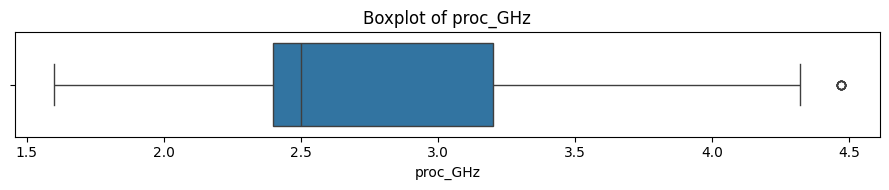

Lower bound: 1.1999999999999995
Upper bound: 4.4
Number of outliers: 7

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


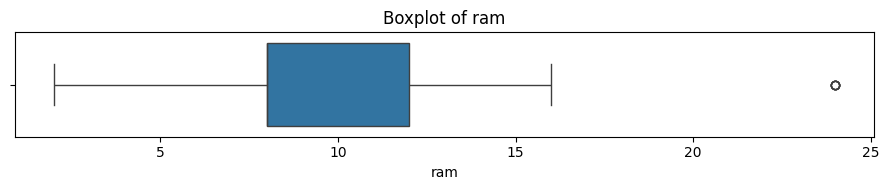

Lower bound: 2.0
Upper bound: 18.0
Number of outliers: 5

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


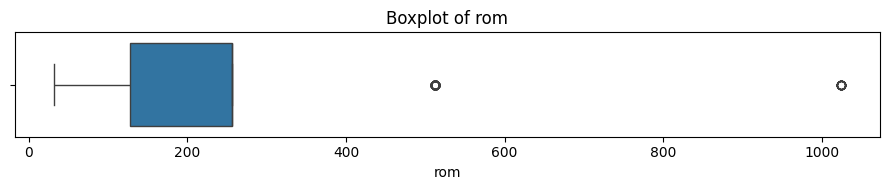

Lower bound: -64.0
Upper bound: 448.0
Number of outliers: 89

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


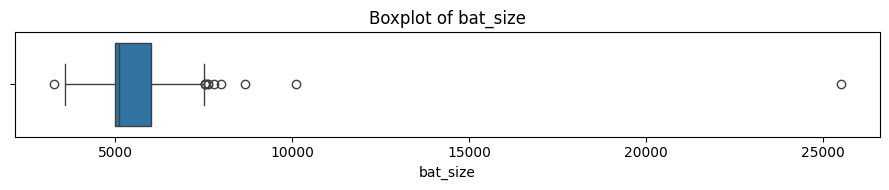

Lower bound: 3500.0
Upper bound: 7500.0
Number of outliers: 11

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


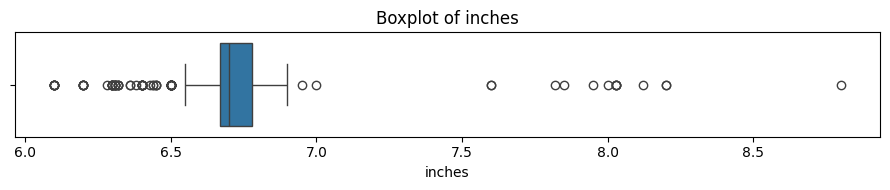

Lower bound: 6.504999999999999
Upper bound: 6.945
Number of outliers: 88

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


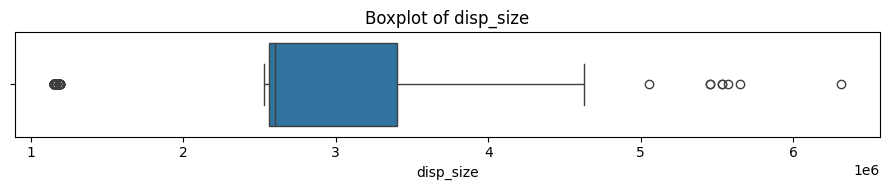

Lower bound: 1305900.0
Upper bound: 4654860.0
Number of outliers: 145

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


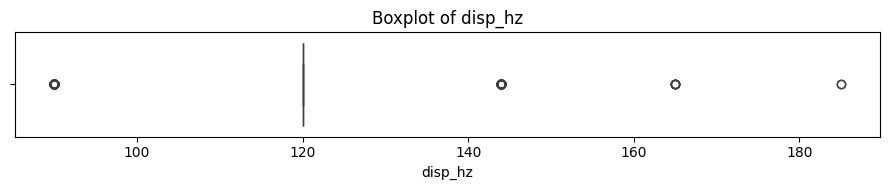

Lower bound: 120.0
Upper bound: 120.0
Number of outliers: 167

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


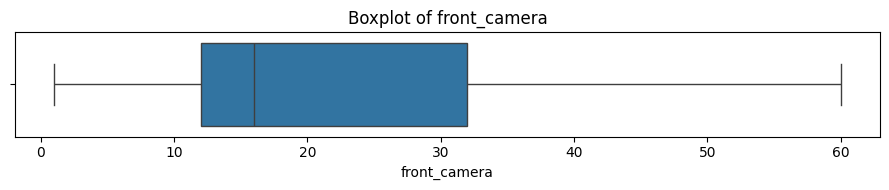

Lower bound: -18.0
Upper bound: 62.0
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


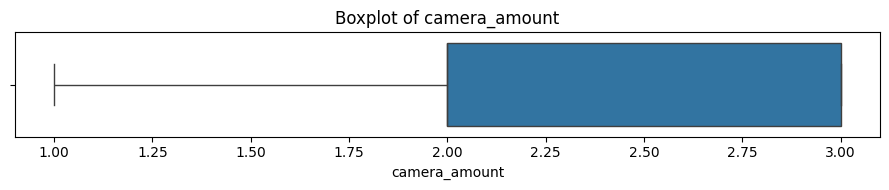

Lower bound: 0.5
Upper bound: 4.5
Number of outliers: 0

/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


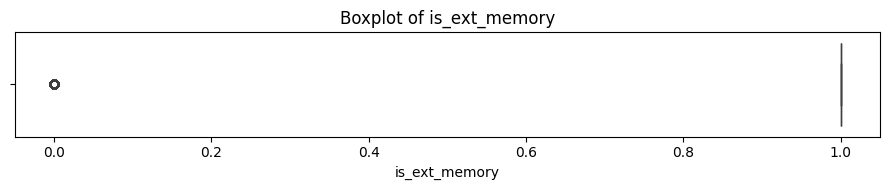

Lower bound: 1.0
Upper bound: 1.0
Number of outliers: 165



In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        continue
    plt.figure(figsize=(9, 2))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Lower bound:', l_bound)
    print('Upper bound:', u_bound)
    print('Number of outliers:', df[(df[col] < l_bound) | (df[col] > u_bound)].shape[0])
    print()

In [13]:
df_save = df.copy()
del df['sup_3G']
del df['sup_4G']

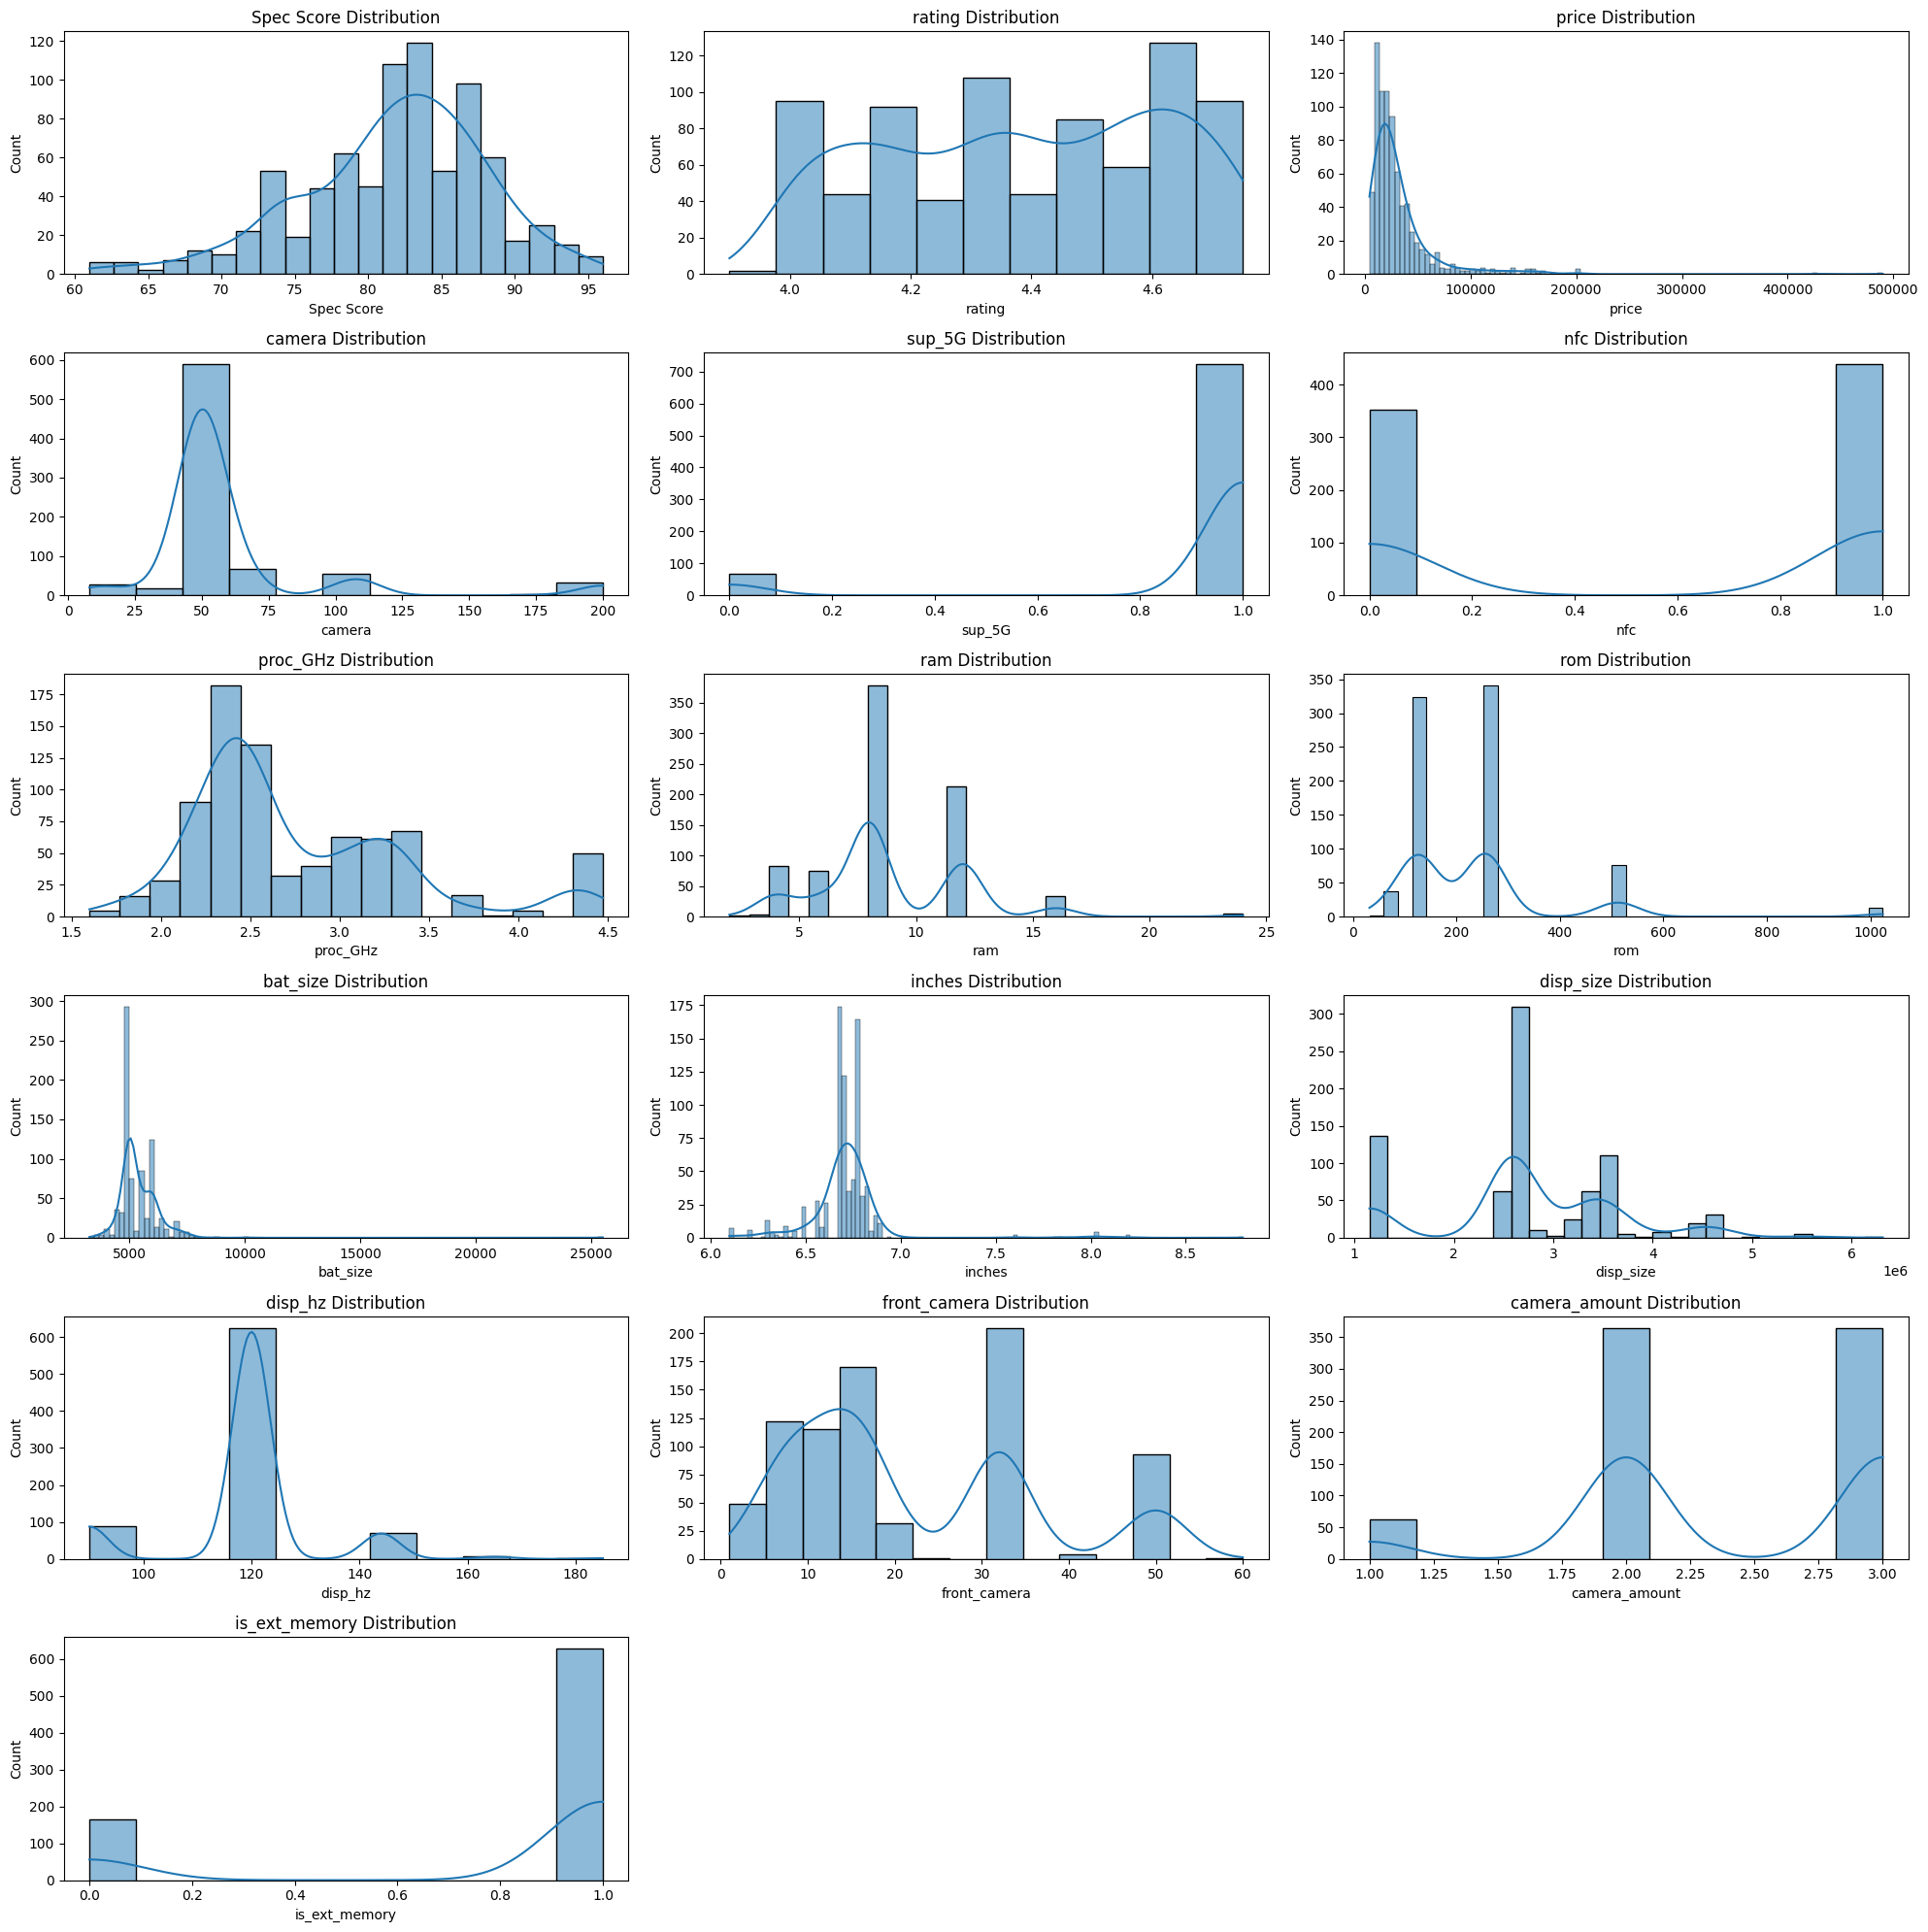

In [14]:
columns = df.columns
columns = columns.drop('creator')


plt.figure(figsize=(20, 20))
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

plt.subplot(num_rows, num_cols, 1)
for indes, col in enumerate(columns):
    plt.subplot(num_rows, num_cols, indes + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [15]:
df = df_save.copy()

In [16]:
df = pd.get_dummies(df, columns=['creator'], dtype=int)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df.drop('price', axis=1))

vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif

/root/venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/root/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


const                0.000000e+00
Spec Score           1.038605e+01
rating               1.063673e+00
camera               1.588094e+00
sup_3G                        inf
sup_4G                        inf
sup_5G               1.684363e+00
nfc                  2.436037e+00
proc_GHz             2.978862e+00
ram                  4.522803e+00
rom                  2.528611e+00
bat_size             3.255491e+00
inches               1.519714e+00
disp_size            3.992771e+00
disp_hz              2.019151e+00
front_camera         2.447080e+00
camera_amount        1.499650e+00
is_ext_memory        1.434802e+00
creator_Acer         4.503600e+15
creator_Alcatel      4.503600e+15
creator_Apple        4.503600e+15
creator_Asus         1.801440e+15
creator_CMF                   inf
creator_Doogee                inf
creator_Fairphone    4.503600e+15
creator_Google                inf
creator_HMD          9.007199e+15
creator_Honor                 inf
creator_Huawei       4.503600e+15
creator_Infini

In [18]:
df = df.iloc[:, 0:17]

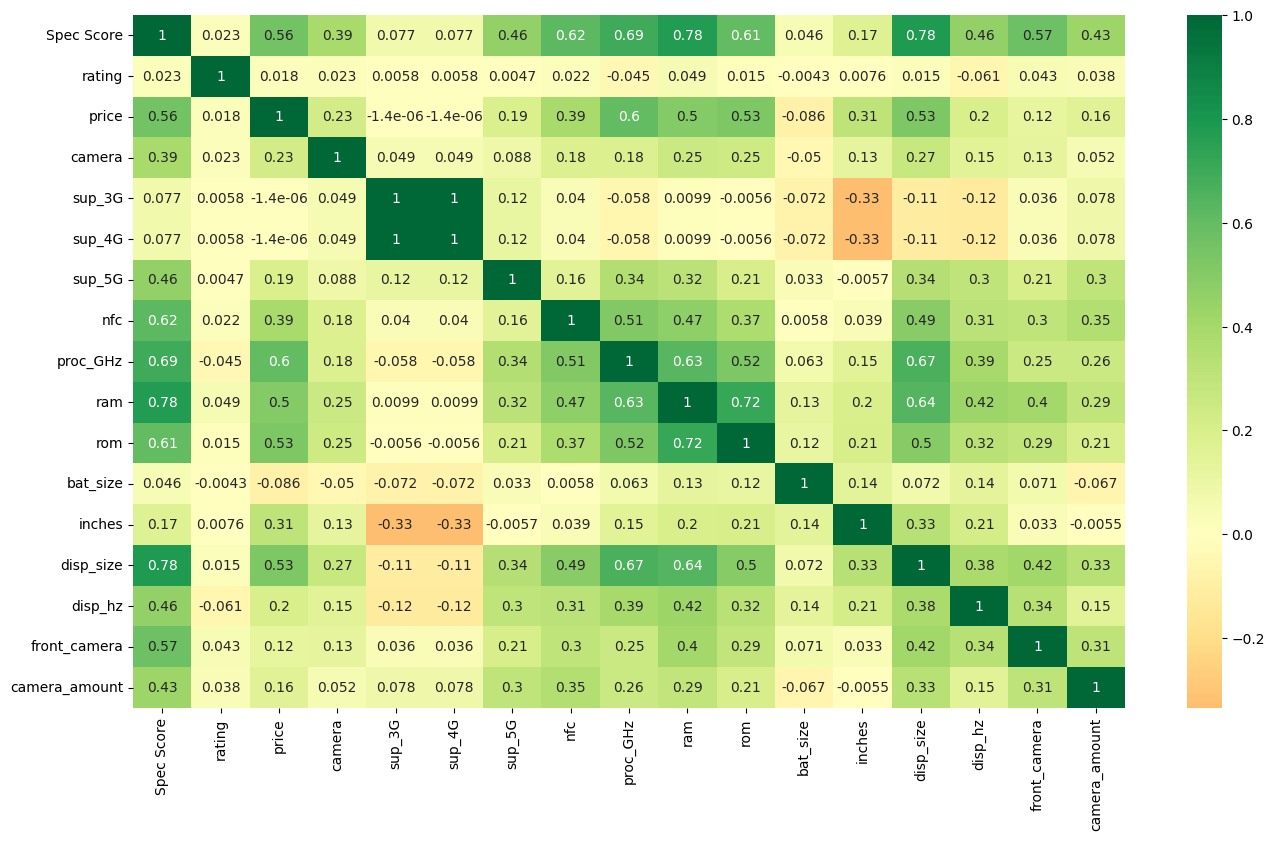

In [19]:
plt.figure(figsize=(16, 9))
df_group = df.copy()
sns.heatmap(df_group.corr(), xticklabels=df_group.corr().columns, yticklabels=df_group.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

In [20]:
df.shape

(792, 17)

In [21]:
df = df_save.copy()
df = pd.get_dummies(df, columns=['creator'], dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 0 to 997
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spec Score         792 non-null    int64  
 1   rating             792 non-null    float64
 2   price              792 non-null    int64  
 3   camera             792 non-null    float64
 4   sup_3G             792 non-null    int64  
 5   sup_4G             792 non-null    int64  
 6   sup_5G             792 non-null    int64  
 7   nfc                792 non-null    int64  
 8   proc_GHz           792 non-null    float64
 9   ram                792 non-null    float64
 10  rom                792 non-null    float64
 11  bat_size           792 non-null    float64
 12  inches             792 non-null    float64
 13  disp_size          792 non-null    float64
 14  disp_hz            792 non-null    float64
 15  front_camera       792 non-null    float64
 16  camera_amount      792 non-null

In [22]:
x = df.drop('price', axis=1)
y = df['price']

In [23]:
df.head()

,Spec Score,rating,price,camera,sup_3G,sup_4G,sup_5G,nfc,proc_GHz,ram,...,creator_Redmi,creator_Samsung,creator_Sony,creator_Tecno,creator_Ulefone,creator_Vertu,creator_Vivo,creator_Xiaomi,creator_iQOO,creator_itel
0,89,4.65,41990,50.0,1,1,1,1,3.25,12.0,...,0,0,0,0,0,0,0,0,0,0
1,87,4.75,32990,50.0,1,1,1,1,3.35,8.0,...,0,0,0,0,0,0,0,0,0,0
2,83,4.75,31999,50.0,1,1,1,1,3.20,12.0,...,0,0,0,0,0,0,0,0,0,0
3,89,4.65,49990,50.0,1,1,1,1,3.25,12.0,...,0,0,0,0,0,0,1,0,0,0
4,73,4.20,11999,50.0,1,1,1,0,2.40,4.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [43]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
models = {
    'Linier Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [49]:
for i in models:
    models[i].fit(x_train, y_train)
    print(i, 'R2:', r2_score(y_test, models[i].predict(x_test)))
    print(i, 'MSE:', mean_squared_error(y_test, models[i].predict(x_test)))
    print('---------------------------------------------------------------')

Linier Regression R2: 0.8879720668470001
Linier Regression MSE: 184432494.0047776
---------------------------------------------------------------
Random Forest R2: 0.9191292309095958
Random Forest MSE: 133138202.37188178
---------------------------------------------------------------
Gradient Boosting R2: 0.9447382147775907
Gradient Boosting MSE: 90977924.74494463
---------------------------------------------------------------


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2511581e-5c9d-4885-bce2-6cc92ed25703' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>